## Bài 2:
* Implement hàm tính convolution, input X, W, stride, padding, output Y.
* Implement hàm [sobel](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html?fbclid=IwAR3glMmUUSBRIhmW8MR-ezCUuOXEDuZF2b-NEz2A76jzfo0JYM1v0eEHTqI)

#### 2.1 Implement hàm tính convolution, input X, W, stride, padding, output Y.

In [ ]:
import numpy as np

In [ ]:
# Thêm mảng đệm các giá trị bằng 0
def zero_pad(X,pad):
    X_pad=np.pad(X,((pad,pad),(pad,pad),(0,0)),'constant',constant_values=0)
    return X_pad

In [ ]:
def conv_single_step(a_slice_prev,W,b):
    """
    a_slice_prev --slice of input data of shape (f,f,n_C_prev)
    W -- Weight parameter - matrix of shape (f,f,n_C_prev)
    b -- bias paramter -matrix of shape (1,1,1)
    """
    s=np.multiply(a_slice_prev,W)+b
    return np.sum(s)

In [ ]:
def conv_forward(X,W,b,stride, padding):
    """
    Arguments:
    X -- Matrix shape of (n_H_prev,n_W_prev,n_C_prev)
    W -- Weight parameter - matrix of shape (f,f,n_C_prev,n_C)
    b -- bias paramter -matrix of shape (1,1,1,n_C)
    
    Return:
    Y -- Matrix of X convolution W
    """
    (n_H_prev,n_W_prev,n_C_prev)=X.shape
    (f,f,n_C_prev,n_C)=W.shape
    
    n_H=int((n_H_prev+2*padding-f)/stride)+1
    n_W=int((n_W_prev+2*padding-f)/stride)+1
    
    Y=np.zeros((n_H,n_W,n_C))
    
    # Create X_pad by padding X
    X_pad=zero_pad(X,padding)
    
    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start=h*stride
                vert_end=vert_start+f
                
                horiz_start=w*stride
                horiz_end=horiz_start+f
                
                x_slice=X_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                
                Y[h,w,c]=conv_single_step(x_slice,W[:,:,:,c],b[:,:,:,c])
                
    return Y

In [ ]:
import matplotlib.pyplot as plt
image_data=plt.imread("/content/drive/MyDrive/PhungMinh Hieu/Homework_5_CNN_VGG16/Images/dog.jpg")

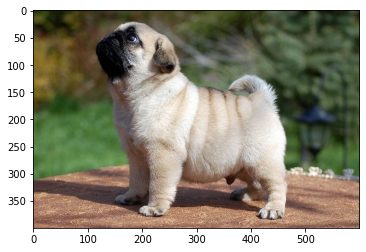

In [ ]:
# show original image
plt.imshow(image_data)

In [ ]:
# edge detection
W=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
W=np.array([W for _ in range(3)])
B=np.zeros((3,3,3,3))
B[...,0]=W
B[...,1]=W
B[...,2]=W
W=B
b=np.zeros((1,1,1,3))


e_image=conv_forward(image_data,W,b,stride=1,padding=1)

In [ ]:
#normalize 
for c in range(3):
    e_image[:,:,c]=(e_image[:,:,c]-np.min(e_image[:,:,c]))/(np.max(e_image[:,:,c])-np.min(e_image[:,:,c]))
e_image=(e_image*255).astype(int)

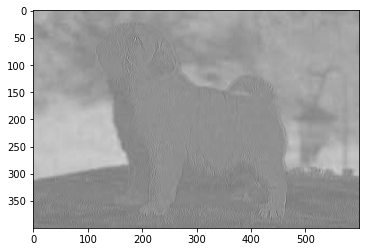

In [ ]:
plt.imshow(e_image)

#### 2.2. Implement hàm sobel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
image=cv2.imread("/content/drive/MyDrive/PhungMinh Hieu/Homework_5_CNN_VGG16/Images/dog.jpg")

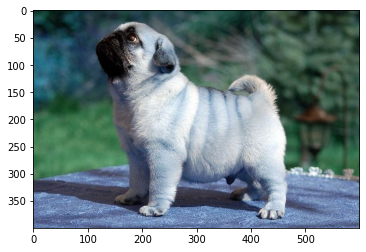

In [ ]:
plt.imshow(image)

In [ ]:
def sobel(src,dx,dy,ksize=3):
    """
    ouput -- matrix shape of (n_H,n_D,1)
    """
    # Gauss filter
    image=cv2.GaussianBlur(src,(3,3),0)
    
    #Convert to gray image
    gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #reshape
    gray_image=gray_image.reshape((gray_image.shape[0],gray_image.shape[1],-1))

    if dx==1 and dy==0:
        #sobel_X
        W=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        W=W.reshape((3,3,-1))
        B=np.zeros((3,3,1,1))
        B[...,0]=W
        W=B
        b=np.zeros((1,1,1,1))

        sobel_x=conv_forward(gray_image,W,b,stride=1,padding=1)
        return sobel_x
    elif dx==0 and dy==1:
        #sobel_y
        W=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        W=W.reshape((3,3,-1))
        B=np.zeros((3,3,1,1))
        B[...,0]=W
        W=B
        b=np.zeros((1,1,1,1))

        sobel_y=conv_forward(gray_image,W,b,stride=1,padding=1)
        return sobel_y
    else:
        print( "Invalid parameter")

In [ ]:
origin_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
sobel_x=sobel(image,1,0)
sobel_y=sobel(image,0,1)
sobel=np.sqrt(sobel_x**2+sobel_y**2)

In [ ]:
#normalize
sobel_x=sobel_x.reshape((sobel_x.shape[0],sobel_x.shape[1]))
sobel_x=(sobel_x-np.min(sobel_x))/(np.max(sobel_x)-np.min(sobel_x))
sobel_x=(sobel_x*255).astype(int)


sobel_y=sobel_y.reshape((sobel_y.shape[0],sobel_y.shape[1]))
sobel_y=(sobel_y-np.min(sobel_y))/(np.max(sobel_y)-np.min(sobel_y))
sobel_y=(sobel_y*255).astype(int)

sobel=sobel.reshape((sobel.shape[0],sobel.shape[1]))
sobel=(sobel-np.min(sobel))/(np.max(sobel)-np.min(sobel))
sobel=(sobel*255).astype(int)

In [ ]:
# Convert 2D image to 3D image by duplicate 3 times 
mask=np.zeros((sobel_x.shape[0],sobel_y.shape[1],3))
for i in range(3):
    mask[:,:,i]=sobel_x
    
sobel_x=mask.astype(int)

mask=np.zeros((sobel_y.shape[0],sobel_y.shape[1],3))
for i in range(3):
    mask[:,:,i]=sobel_y
    
sobel_y=mask.astype(int)

mask=np.zeros((sobel.shape[0],sobel.shape[1],3))
for i in range(3):
    mask[:,:,i]=sobel
    
sobel=mask.astype(int)

Text(0.5, 1.0, 'sobel')

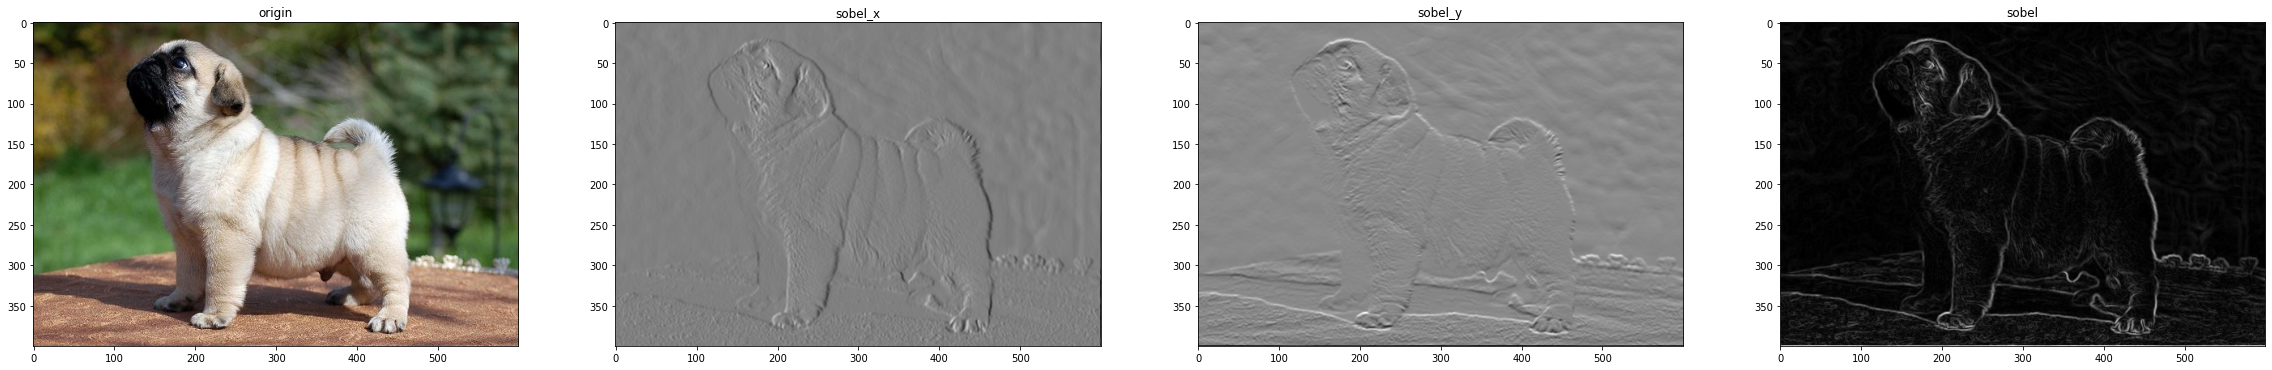

In [ ]:
f,axes=plt.subplots(1,4,figsize=(40,10))
axes[0].imshow(origin_image)
axes[0].set_title('origin')
axes[1].imshow(sobel_x)
axes[1].set_title('sobel_x')
axes[2].imshow(sobel_y)
axes[2].set_title('sobel_y')
axes[3].imshow(sobel)
axes[3].set_title('sobel')